# First-order difference equations
$$
x_t = F_t(x_{t-1})
$$
>### What is a solution to a difference equation?
> A series $x_t, t=1,2,...$ such that.
>1. $x_t=F_t(x_{t-1})$ for every $t$
>2. boundary condition: $x_0 = c$

## Linear
$$
x_t = a x_{t-1} +b
$$
by subtracting $b/(1-a)$
$$
(x_t-b/(1-a)) = a(x_{t-1} - b/(1-a))
- (1-a)b/(1-a) +b
$$
$$
\tilde x_t = a \tilde x_{t-1}
$$
$$
\tilde x_t = c a^t
$$
with $c$ pinned down by boundary condition, for example:
$$
\tilde x_0 = X_0, c=X_0
$$
With lag operator notation (see later)
$$
x_t(1-aL) = 0
$$


In [1]:
using Plots
function plot_AR1(A, x0)
    x = zeros(30)
    x[1] = x0
    for t = 2:30
        x[t] = A * x[t-1]
    end
    plot(x)
end

plot_AR1 (generic function with 1 method)

Better to let one function do one thing.

In [52]:
function forecast_AR1(A, x0)
    x = zeros(30)
    x[1] = x0
    for t = 2:30
        x[t] = A * x[t-1]
    end
    return(x)
end

forecast_AR1 (generic function with 1 method)

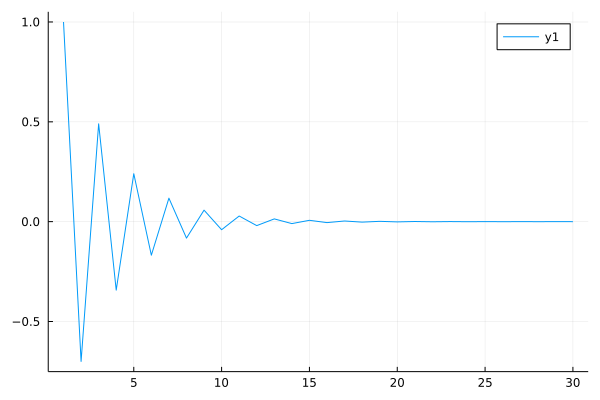

In [5]:
plot_AR1(-0.7, 1)

## Second order
$$
x_t = a_1 x_{t-1} + a_2 x_{t-2}
$$
> Remove $b/(1-a_1-a_2)$
## Lag operator
$$
Lx_t \equiv x_{t-1}
$$ 
L is a linear operator
$$
L(a+b x_t) = a+b Lx_t 
$$
with this definition,
$$
x_t = a_1 Lx_t + a_2 LLx_t
$$
$$
x_t(1 - a_1L - a_2L^2) = 0
$$
$$
x_t(1-\lambda_1 L)(1-\lambda_2 L) = 0
$$
> $$
a_1 = \lambda_1 + \lambda_2
$$
> $$
a_2 = - \lambda_1 \lambda_2
$$

Suppose $x_{1t}$ is solution to first-order DE, 
$$
x_{1t} (1-\lambda_1 L) = 0,
$$
then it is also a solution to the second-order DE.

> Because $x_{1t} (1-\lambda_1 L)(1-\lambda_2 L) =0(1-\lambda_2 L)=0.$

Let 
$$
x_{1t} = c_1 \lambda_1^t
$$
$$
x_{2t} = c_2 \lambda_2^t
$$
be the first-order solution, then
$$
c_1 \lambda_1^t + c_2 \lambda_2^t
$$
is the generic solution to second-order DE, with
$c_1$ and $c_2$ pinned down by boundary condition.

In [6]:
function plot_AR2(a1, a2, x0)
    x = zeros(30)
    x[1] = x0
    x[2] = x0
    for t = 3:30
        x[t] = a1 * x[t-1] + a2 * x[t-2]
    end
    plot(x)
end

plot_AR2 (generic function with 1 method)

In [7]:
function forecast_AR2(a1, a2, x0)
    T = 30
    x = zeros(T)
    x[1] = x0
    x[2] = x0
    for t = 3:T
        x[t] = a1 * x[t-1] + a2 * x[t-2]
    end
    return(x)
end

forecast_AR2 (generic function with 1 method)

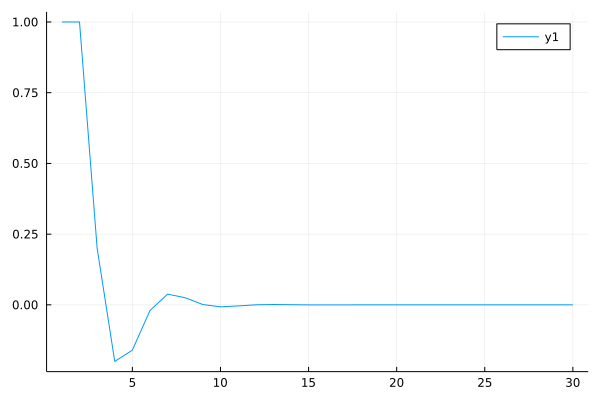

In [12]:
plot(forecast_AR2(0.5, -0.3, 1))

In [13]:
function get_a_from_lambda(λ1, λ2)
    return λ1 + λ2, -λ1 * λ2
end

get_a_from_lambda (generic function with 1 method)

In [14]:
get_a_from_lambda(0.2, 0.1)

(0.30000000000000004, -0.020000000000000004)

By the way, we can avoid floating point errors with rational numbers, but this will be rarely used in practice.

In [16]:
2//10 + 1//10

3//10

## Complex roots
if 
$$
\lambda_{1,2} = l \pm m\mathbf i
$$
$$
\lambda_{1,2} = R e^{\pm \theta \mathbf i}
$$
$$
R^t[e^{+\theta \mathbf i t} + e^{-\theta \mathbf i t}]
$$


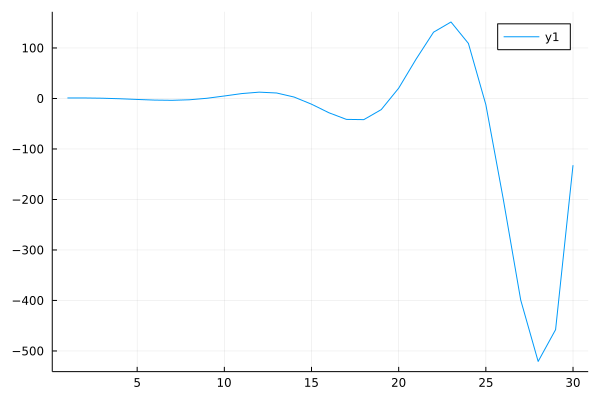

In [49]:
a1, a2 = get_a_from_lambda(1.05+0.7im, 1.05-0.7im)
plot(forecast_AR2(a1, a2, 1))

In [18]:
a1, _ = get_a_from_lambda(0.7, 0.3)

(1.0, -0.21)

In [19]:
a1

1.0

In [27]:
z = Complex(3.0, 0.4)

3.0 + 0.4im

In [28]:
typeof(z)

ComplexF64 (alias for Complex{Float64})

Two ways of defining complex conjugates:

In [34]:
0.7 * exp(-0.2*im), 0.7 * exp(+0.2*im)

(0.6860466044888691 - 0.13906853155654283im, 0.6860466044888691 + 0.13906853155654283im)

In [35]:
pi

π = 3.1415926535897...

In [36]:
π

π = 3.1415926535897...

In [37]:
z = 0.7 * exp(-0.2*im)

0.6860466044888691 - 0.13906853155654283im

In [42]:
sqrt(real(z)^2+imag(z)^2)

0.7

In [58]:
a1, a2 = get_a_from_lambda(0.7, 0.3)

(1.0, -0.21)

In [59]:
x1 = forecast_AR1(0.7, 1.0)
x2 = forecast_AR1(0.3, 1.0)
x = forecast_AR2(a1, a2, 1.0)

30-element Vector{Float64}:
 1.0
 1.0
 0.79
 0.5800000000000001
 0.4141000000000001
 0.29230000000000006
 0.20533900000000005
 0.14395600000000003
 0.10083481000000002
 0.07060405000000002
 0.04942873990000001
 0.03460188940000001
 0.02422185402100001
 ⋮
 0.0028497235057779206
 0.001994806570270691
 0.0013963646340573277
 0.0009774552543004825
 0.0006842186811484437
 0.00047895307774534245
 0.0003352671547041693
 0.00023468700837764737
 0.00016428090588977183
 0.00011499663413046588
 8.049764389361379e-5
 5.6348350726215956e-5

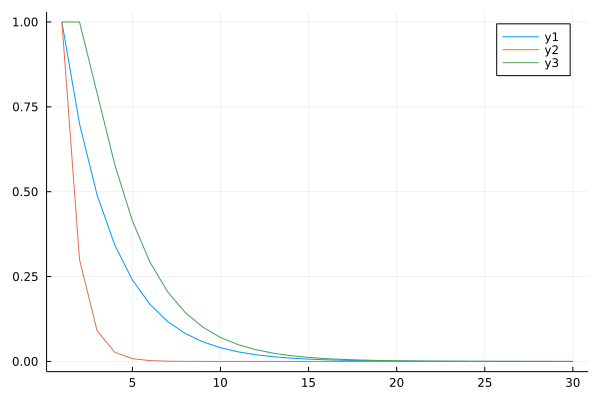

In [60]:
plot([x1 x2 x])

## Extra notes
See:
https://github.com/CEU-Economics-and-Business/ECBS-6001-Advanced-Macroeconomics/blob/master/ECBS-6001-Advanced-Macroeconomics.md

Export graphs
